<a href="https://colab.research.google.com/github/dev-kentayamada/machine-learning/blob/main/statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#回帰分析
単回帰式: $$\widehat{y}=b_{0}+b_{1}x_{1}$$
重回帰式: $$\widehat{y}=b_{0}+b_{1}x_{1}+b_{2}x_{2}+...+b_{n}x_{n}$$

##ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set() #seabornのデフォルトスタイルを適用

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##データを読み込む

In [2]:
!gdown --id 1ax6trdeMfcBtKwTUa7d4k7fh2pkm1Jgq #Google driveからデータをダウンロード
data = pd.read_csv('1.03. Dummies.csv')
print(data)
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0}) #ダミー変数にする
print(data.describe())

Downloading...
From: https://drive.google.com/uc?id=1ax6trdeMfcBtKwTUa7d4k7fh2pkm1Jgq
To: /content/1.03. Dummies.csv
100% 1.22k/1.22k [00:00<00:00, 2.13MB/s]
     SAT   GPA Attendance
0   1714  2.40         No
1   1664  2.52         No
2   1760  2.54         No
3   1685  2.74         No
4   1693  2.83         No
..   ...   ...        ...
79  1936  3.71        Yes
80  1810  3.71        Yes
81  1987  3.73         No
82  1962  3.76        Yes
83  2050  3.81        Yes

[84 rows x 3 columns]
               SAT        GPA  Attendance
count    84.000000  84.000000   84.000000
mean   1845.273810   3.330238    0.464286
std     104.530661   0.271617    0.501718
min    1634.000000   2.400000    0.000000
25%    1772.000000   3.190000    0.000000
50%    1846.000000   3.380000    0.000000
75%    1934.000000   3.502500    1.000000
max    2050.000000   3.810000    1.000000


##回帰分析に使うデータの指定

In [3]:
list_x = list()
list_y = list()
list_X = list()

###単回帰

In [4]:
list_x.append(data['SAT']) #説明変数
list_y.append(data['GPA']) #目的変数

###重回帰

In [5]:
list_x.append(data[['SAT','Attendance']]) #説明変数
list_y.append(data['GPA']) #目的変数

##切片をモデル式に含める
statsmodelでは、切片($b_{0}$)を必要とする線形回帰のモデル式の場合は、全要素が1.0の列を説明変数の先頭に追加する必要がある。<br>
$\widehat{y}=b_{0}\times \color{red}{1.0}+b_{1}x_{1}$

In [6]:
for x in list_x:
  list_X.append(sm.add_constant(x))

##回帰分析の実行
|名称|意味|
|:-|:-|
|coef|回帰係数|
|std err|標準誤差(予測の正確性)|
|t|t値|
|P>ltl|p値(有意水準以下の値を取れば、回帰係数の有意性が言える。)|
|R-squared|決定係数(1に近いほど精度の高い分析と言える)|
|Dep. Variable|目的変数|
|Adj. R-squared|自由度調整済み決定係数(説明変数が多い時は決定係数の代わりに用いる)|
|F-statistic|F値(この値は大きいほどよい)|
|Prob (F-statistic)|F値の判断基準(0.05％以下が、望ましい)|



* (coef) と (const) が交わった所にある数字が切片
* (coef) と (SAT) が交わったところにある数字が傾き



In [7]:
for X, y in zip(list_X, list_y):
  model = sm.OLS(y, X) #モデルの設定(OLS＝最小二乗法を指定)
  results = model.fit() #回帰分析の実行
  print(results.summary()) #結果の詳細を表示
  print("\n\n\n")

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           7.20e-11
Time:                        14:03:21   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.5

##計算された回帰モデル

###単回帰
$$\widehat{y}=0.275+0.0017 \times x_{1}$$
$$GPA=0.275+0.0017 \times SAT$$

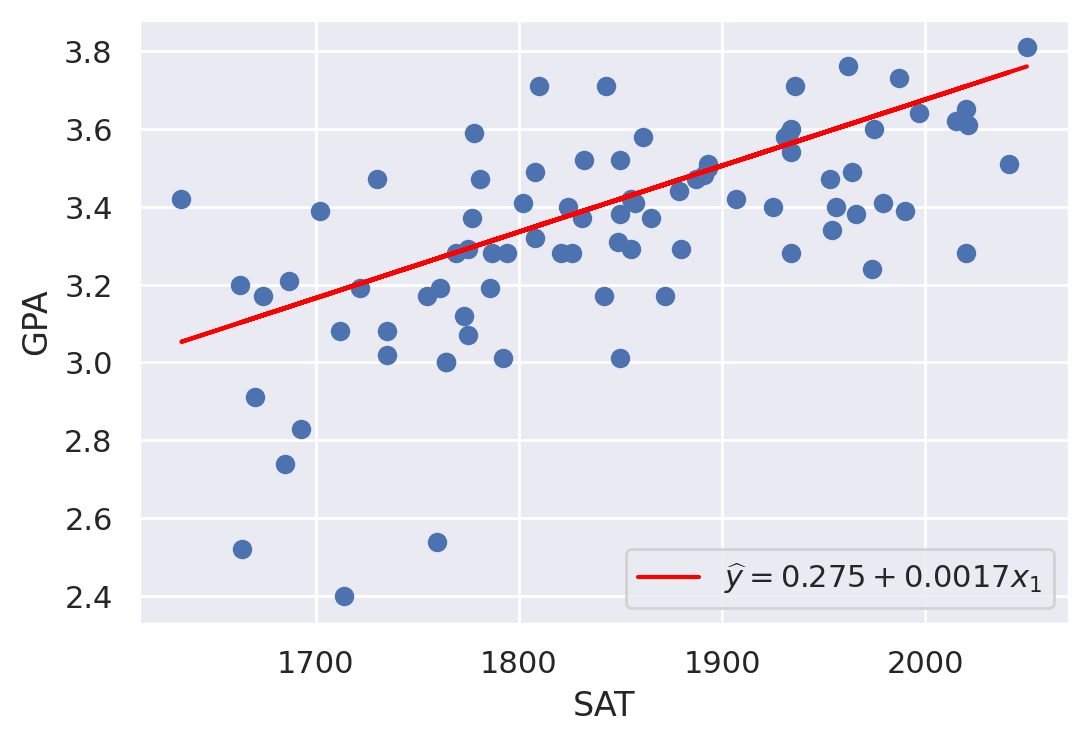

In [8]:
simple_linear_yHat = 0.275 + 0.0017 * data['SAT']

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111,xlabel='SAT', ylabel='GPA')
# labelオプションで凡例に用いる曲線名を指定
ax.scatter(data['SAT'], data['GPA'])
ax.plot(data['SAT'], simple_linear_yHat, color="red", label="$\widehat{y}=0.275+0.0017x_{1}$")
# 凡例の表示
ax.legend()

###重回帰
$$\widehat{y}=0.6439+0.0014\times x_{1}+0.2226\times x_{2}$$
$$GPA=0.6439+0.0014\times SAT+0.2226\times Attendance(0/1)$$

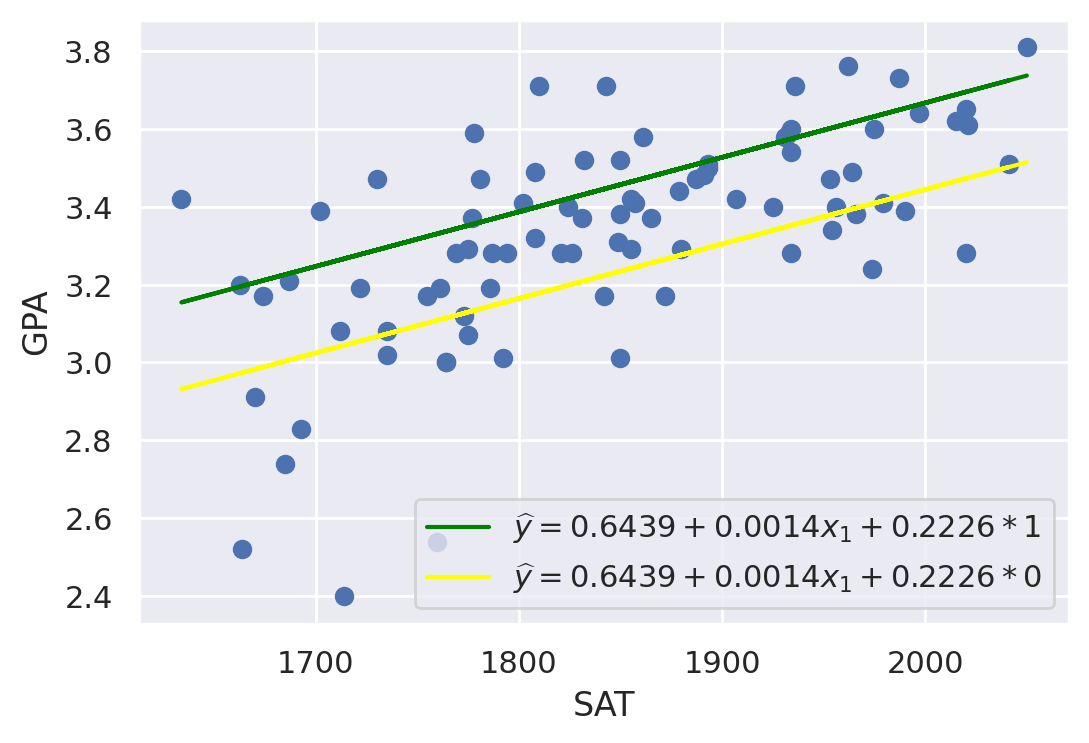

In [9]:
multiple_linear_yHat_attend = 0.6439 + 0.0014 * data['SAT'] + 0.2226 * 1
multiple_linear_yHat_notAttend = 0.6439 + 0.0014 * data['SAT'] + 0.2226 * 0

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111,xlabel='SAT', ylabel='GPA')
# labelオプションで凡例に用いる曲線名を指定
ax.scatter(data['SAT'], data['GPA'])
ax.plot(data['SAT'], multiple_linear_yHat_attend, color="green", label="$\widehat{y}=0.6439+0.0014x_{1}+0.2226*1$")
ax.plot(data['SAT'], multiple_linear_yHat_notAttend, color="yellow", label="$\widehat{y}=0.6439+0.0014x_{1}+0.2226*0$")
# 凡例の表示
ax.legend()

###まとめ

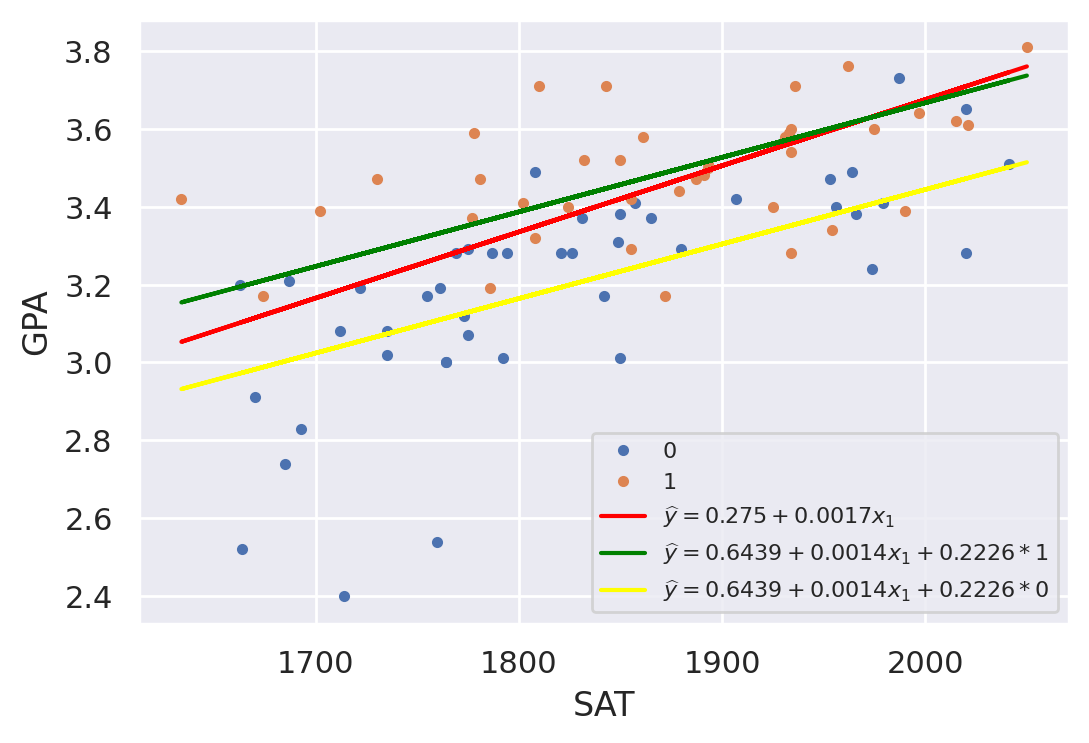

In [10]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111,xlabel='SAT', ylabel='GPA')
for name, group in data.groupby('Attendance'):
  ax.plot(group.SAT, group.GPA, marker='o', linestyle='', ms=3, label=name)
ax.plot(data['SAT'], simple_linear_yHat, color="red", label="$\widehat{y}=0.275+0.0017x_{1}$")
ax.plot(data['SAT'], multiple_linear_yHat_attend, color="green", label="$\widehat{y}=0.6439+0.0014x_{1}+0.2226*1$")
ax.plot(data['SAT'], multiple_linear_yHat_notAttend, color="yellow", label="$\widehat{y}=0.6439+0.0014x_{1}+0.2226*0$")
# 凡例の表示
ax.legend(fontsize=8, loc='lower right')